In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib

In [2]:
PATH = '/home/mayuris/workspace/saras3/'
file = 'ms_fit_joint'
sys.path.insert(1, PATH)

In [3]:
from ms_fit_joint import ms_fit
from utils.misc import RMS_data

ModuleNotFoundError: No module named 'prettytable'

In [76]:
font = {'family' : 'sans-serif',
        'size'   : 20,
        'sans-serif':['Lucida Grande']}

matplotlib.rc('font', **font)

In [66]:
x     = np.linspace(50, 200, 1000)
y0    = 200
x0    = 150
alpha = -2.5

domain = 'log_log'
LOWF   = np.amin(x)-1 #Need to fix this. By default it reduces an index
HGHF   = np.amax(x)+1
order  = 3

In [67]:
y = y0 * (x/x0)**alpha

In [68]:
fit_params = {'domain':domain, 'xmin':LOWF, 'xmax':HGHF, 'rescale':True,'norder':order,\
         'niter':1, 'smooth':False, 'basin_iter_loops':100, 'xtol':1e-10, 'ftol':1e-10,\
         'temp':1e-5, 'stepsize':1e-5}

In [50]:
param, x_fit, imin, imax, fit, res, err \
= ms_fit(x, y, **fit_params)

+------------------+--------------------+
|    Parameter     |       Value        |
+------------------+--------------------+
|      error       |   1000 elements    |
|       xtol       |       1e-10        |
|       ftol       |       1e-10        |
|      domain      |      log_log       |
|     maxiter      |      100000.0      |
|      maxfev      |      100000.0      |
|       algo       |    Nelder-Mead     |
|      norder      |         3          |
|       temp       |       1e-05        |
|     stepsize     |       1e-05        |
|      niter       |         1          |
| basin_iter_loops |        100         |
|       xmin       |        49.0        |
|       xmax       |       201.0        |
|     rescale      |        True        |
|       seed       |         1          |
|     additive     |        True        |
|      joint       |       False        |
|      signal      |      [False]       |
|     add_ini      |        0.0         |
|     op_file      |        True  

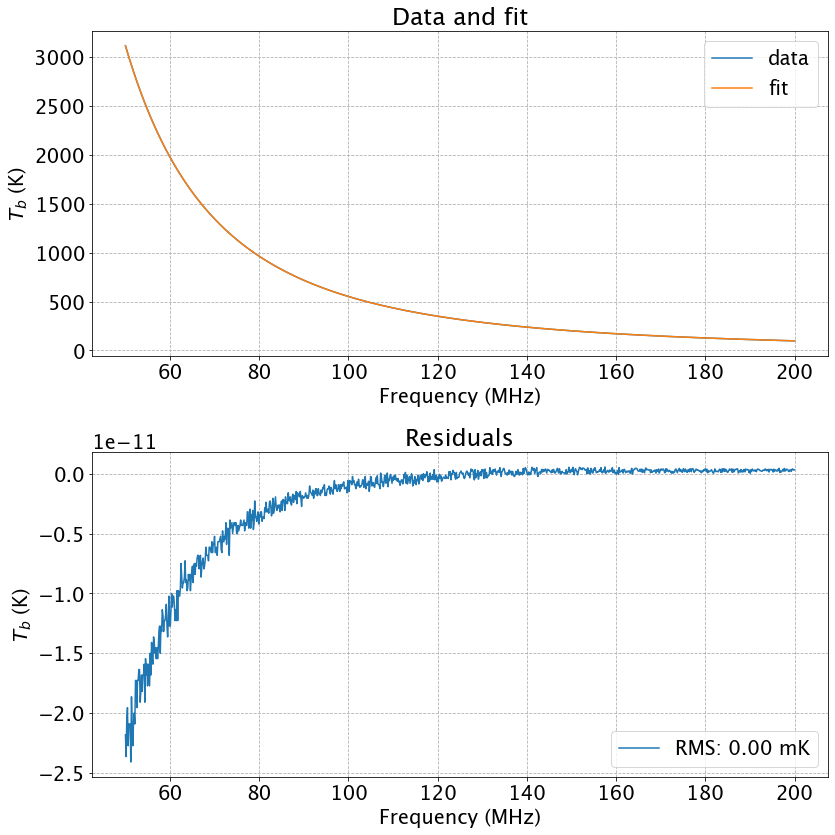

In [86]:
rms = RMS_data(np.ones(len(res)), res)

nrow, ncol = 2, 1

xlabel = 'Frequency (MHz)'
ylabel = '$T_b$ (K)'
titles = ['Data and fit', 'Residuals']

fig, ax = plt.subplots(nrow, ncol, figsize=(12*ncol,6*nrow))
ax[0].plot(x, y, label='data')
ax[0].plot(x, fit, label='fit')
ax[1].plot(x, res, label='RMS: {:.2f} mK'.format(rms*1e3))

for val, axx in enumerate(ax):
    axx.set_xlabel(xlabel)
    axx.set_ylabel(ylabel)
    axx.set_title(titles[val])
    axx.grid(ls='--')
    axx.legend()

fig.tight_layout()
plt.show()